In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, GRU, SimpleRNN, Dense
import matplotlib.pyplot as plt
import random

In [35]:
s_vocab = ['0', '1', '2', '3']
t_vocab = ['4', '5', '6', '7']
mapping = {'0': '4', '1': '5', '2': '6', '3': '7'}

source_to_idx = {ch: i for i, ch in enumerate(s_vocab)}
target_to_idx = {ch: i for i, ch in enumerate(t_vocab)}
idx_to_target = {i: ch for ch, i in target_to_idx.items()}
vocab_size = len(source_vocab)
def generate_dna_rna_pairs(n_samples=1000, seq_len=10):
    X, y = [], []
    for _ in range(n_samples):
        dna_seq = [random.choice(s_vocab) for _ in range(seq_len)]
        rna_seq = [mapping[ch] for ch in dna_seq]
        X.append([source_to_idx[ch] for ch in dna_seq])
        y.append([target_to_idx[ch] for ch in rna_seq])
    return np.array(X), np.array(y)

In [36]:
def build_and_train_seq2seq_model(cell_type, X_train, y_train, X_test, y_test, seq_len, vocab_size, epochs=20):
    print(f"\n Training with {cell_type}...")
    inputs = Input(shape=(seq_len,))
    x = Embedding(input_dim=vocab_size, output_dim=8)(inputs)

    if cell_type == 'RNN':
        x = SimpleRNN(64, return_sequences=True)(x)
    elif cell_type == 'LSTM':
        x = LSTM(64, return_sequences=True)(x)
    elif cell_type == 'GRU':
        x = GRU(64, return_sequences=True)(x)
    else:
        raise ValueError("Unsupported cell type.")

    outputs = Dense(vocab_size, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        X_train, y_train[..., np.newaxis],
        validation_data=(X_test, y_test[..., np.newaxis]),
        epochs=epochs, batch_size=32, verbose=0
    )
    loss, acc = model.evaluate(X_test, y_test[..., np.newaxis], verbose=0)
    print(f"{cell_type} Test Accuracy: {acc:.4f}")

    return model, history, acc

In [37]:
def plot_training_curves(history, title_prefix="Model"):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train', color='purple')
    plt.plot(history.history['val_accuracy'], label='Validation', color='green')
    plt.title(f"{title_prefix} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train', color='green')
    plt.plot(history.history['val_loss'], label='Validation', color='orange')
    plt.title(f"{title_prefix} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [42]:
def s_prediction(model, X_sample, y_true):
    pred = model.predict(X_sample[np.newaxis, :], verbose=0)
    pred_seq = np.argmax(pred[0], axis=-1)
    dna_seq = ''.join([s_vocab[i] for i in X_sample])
    actual_rna = ''.join([idx_to_target[i] for i in y_true])
    predicted_rna = ''.join([idx_to_target[i] for i in pred_seq])

    print("DNA Input     :", dna_seq)
    print("True RNA      :", actual_rna)
    print("Predicted RNA :", predicted_rna)


 Training with RNN...
RNN Test Accuracy: 1.0000


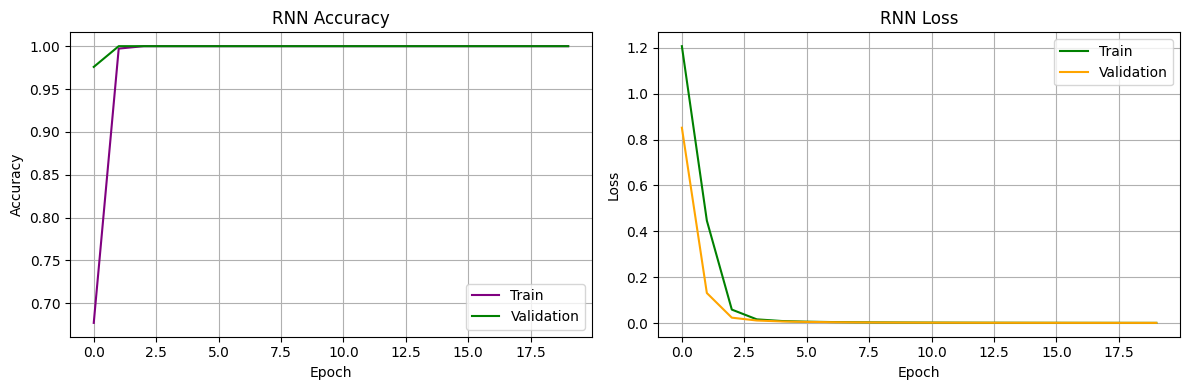

Final Test Accuracy for RNN: 1.0000
Sample prediction:
DNA Input     : 231211330000031013200002220200332220201322331132022303030223023331122321032
True RNA      : 675655774444475457644446664644776664645766775576466747474667467775566765476
Predicted RNA : 675655774444475457644446664644776664645766775576466747474667467775566765476
--------------------------------------------------

 Training with LSTM...
LSTM Test Accuracy: 1.0000


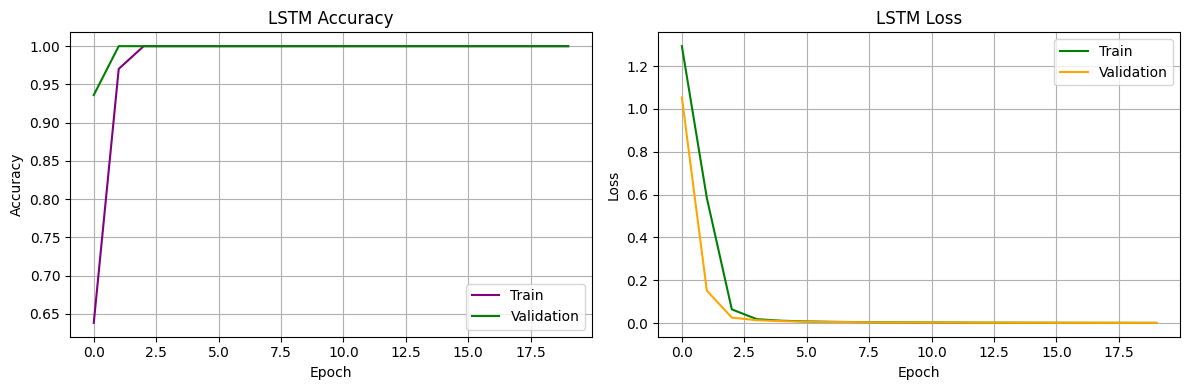

Final Test Accuracy for LSTM: 1.0000
Sample prediction:
DNA Input     : 231211330000031013200002220200332220201322331132022303030223023331122321032
True RNA      : 675655774444475457644446664644776664645766775576466747474667467775566765476
Predicted RNA : 675655774444475457644446664644776664645766775576466747474667467775566765476
--------------------------------------------------

 Training with GRU...
GRU Test Accuracy: 1.0000


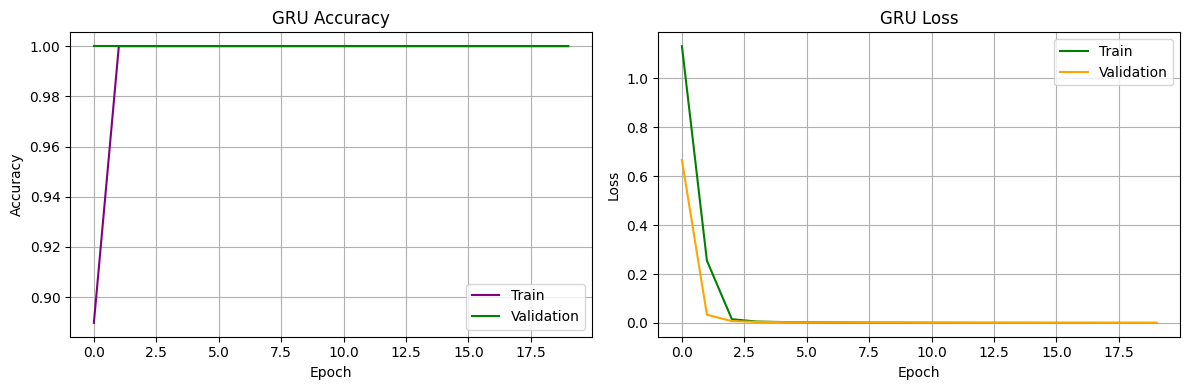

Final Test Accuracy for GRU: 1.0000
Sample prediction:


DNA Input     : 231211330000031013200002220200332220201322331132022303030223023331122321032
True RNA      : 675655774444475457644446664644776664645766775576466747474667467775566765476
Predicted RNA : 675655774444475457644446664644776664645766775576466747474667467775566765476
--------------------------------------------------


In [43]:
SEQ_LEN = 75
X_train, y_train = generate_dna_rna_pairs(1000, SEQ_LEN)
X_test, y_test = generate_dna_rna_pairs(200, SEQ_LEN)

for cell in ['RNN', 'LSTM', 'GRU']:
    model, history, acc = build_and_train_seq2seq_model(cell, X_train, y_train, X_test, y_test, SEQ_LEN, vocab_size)
    plot_training_curves(history, title_prefix=cell)
    print(f"Final Test Accuracy for {cell}: {acc:.4f}")
    print("Sample prediction:")
    s_prediction(model, X_test[0], y_test[0])
    print("-" * 50)

Summary:

Focuses on the DNA-to-RNA transcription task using three types of recurrent neural networks: Simple RNN, LSTM (Long Short-Term Memory), and GRU (Gated Recurrent Unit). The objective is to build a sequence-to-sequence model that converts DNA sequences into corresponding RNA sequences based on a defined mapping (0→4, 1→5, 2→6, 3→7).

Model Architecture & Training Overview
All three models share a similar foundational structure:

Input Layer: Accepts sequences of fixed length {75}.

Embedding Layer Converts integer-encoded DNA bases into dense 8-dimensional vectors. The input dimension is of size 4.

Recurrent Layer Uses either a SimpleRNN, LSTM, or GRU layer with 64 units. return_sequences=True ensures the output retains the same sequence length, which is essential for sequence-to-sequence tasks like transcription.

Output Layer A Dense layer with 4 units ,RNA vocabulary size and softmax activation, producing a probability distribution over RNA bases at each position.

The models are trained using the Adam optimizer, with sparse categorical cross-entropy as the loss function, and accuracy as the evaluation metric.



| Parameter           | Value                           | Description                                 |
| ------------------- | ------------------------------- | ------------------------------------------- |
| Sequence Length     | 75                              | Length of DNA and RNA sequences             |
| Vocabulary Size     | 4                               | Number of unique DNA/RNA characters         |
| Training Samples    | 1000                            | Number of DNA-RNA pairs used for training   |
| Testing Samples     | 200                             | Number of DNA-RNA pairs used for evaluation |
| Embedding Dimension | 8                               | Size of embedding vectors                   |
| Recurrent Units     | 64                              | Number of units in RNN, LSTM, or GRU layers |
| Epochs              | 20                              | Number of training iterations               |
| Batch Size          | 32                              | Number of samples per training batch        |
| Optimizer           | Adam                            | Optimization algorithm                      |
| Loss Function       | Sparse Categorical Crossentropy | Loss used during training                   |
| Evaluation Metric   | Accuracy                        | Metric to assess model performance          |
